In [1]:
import cv2
import numpy as np
import face_recognition
import os

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt2.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()
path = r'ImagesAttendance'
images = []
classNames = []
personsList = os.listdir(path)
for cl in personsList:
    curPersonn = cv2.imread(f'{path}/{cl}')
    images.append(curPersonn)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)


['bill', 'elon', 'Khalifa', 'mostafa', 'Obama', 'salah', 'steve', 'zakaria']


In [3]:
labels = np.unique(classNames)
print(labels)

['Khalifa' 'Obama' 'bill' 'elon' 'mostafa' 'salah' 'steve' 'zakaria']


In [4]:
print("number of samples :", len(classNames))


number of samples : 8


In [5]:
def findEncodeings(image):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList


In [6]:
encodeListKnown = findEncodeings(images)
print('Encoding Complete.')

Encoding Complete.


In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()

le.fit(classNames)

labels = le.classes_

name_vec = le.transform(classNames)

categorical_name_vec = to_categorical(name_vec)

In [8]:
X=np.array(encodeListKnown)
X=X.reshape(X.shape[0], -1)
y=np.array(categorical_name_vec),

In [9]:
print(name_vec)


[2 3 0 4 1 5 6 7]


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    np.array(categorical_name_vec),       
                                                    test_size=0.15, 
                                                    shuffle=False)

In [11]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)


(6, 128) (6, 8) (2, 128) (2, 8)


In [12]:
x_train=x_train/255
x_train=x_train/255

In [13]:
from sklearn.neural_network import MLPRegressor
MLPRegressorModel = MLPRegressor(activation='tanh', 
                                 solver='lbfgs',  
                                 learning_rate='constant',
                                 alpha=0.000001)
MLPRegressorModel.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-06, solver='lbfgs')

In [14]:
print(x_train)
print(x_test)
print(y_test)

[[-2.41768304e-07  4.50122372e-07 -4.28527089e-07  5.52292333e-08
  -2.37339302e-06 -6.67659102e-08 -7.33091069e-07 -1.49811015e-06
   1.94305803e-06 -8.93959675e-07  2.39116694e-06  4.03999469e-07
  -3.64623130e-06 -6.97950224e-07  7.55540147e-07  1.59971934e-06
  -2.91932917e-06 -1.44300863e-06 -2.07711554e-06 -1.43829732e-06
  -1.67316769e-06 -9.45189363e-07  1.46670417e-06  1.04041020e-07
  -2.22452372e-06 -3.35657037e-06 -2.22907393e-06 -2.28649353e-06
   2.66365618e-06 -1.26982689e-06  6.34173082e-07  8.05739472e-07
  -2.40983458e-06 -8.39811398e-07  8.43256483e-07  1.85456930e-06
  -1.34019062e-06 -9.76370257e-07  3.83645560e-06 -3.16681242e-07
  -2.54504225e-06 -6.79634056e-07  9.95729965e-07  3.11270648e-06
   4.01864598e-06  1.05077970e-06  5.51001114e-07 -6.27183000e-07
   1.78510102e-06 -3.12867507e-06  1.97509283e-06  2.53740846e-06
   2.46696315e-06  1.44783005e-06  1.02816190e-06 -2.12329963e-06
   1.37242066e-06  3.27066681e-06 -2.27900433e-06  1.33285141e-06
   1.95763

In [15]:
y_pred=np.array(MLPRegressorModel.predict(x_test))
print(y_pred)

[[-0.05338163  0.24058423  0.13715772  0.40419375  0.13089136  0.06033004
   0.28299394 -0.21830585]
 [-0.09263274  0.32181384  0.2225128   0.33923909  0.04190375  0.10442799
   0.3626717  -0.18181172]]


In [16]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

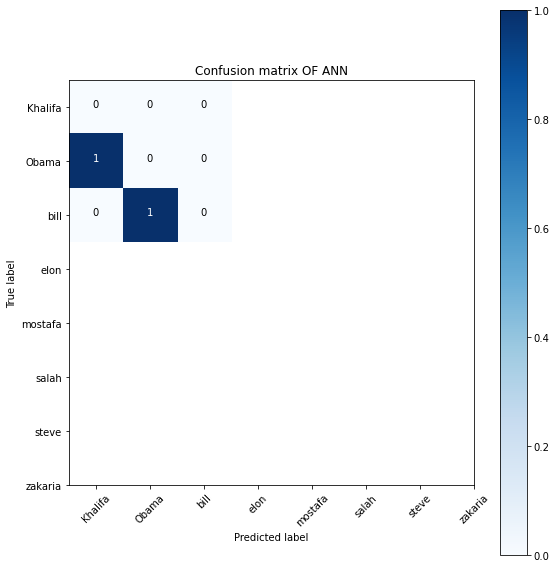

In [17]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix OF ANN')

In [18]:
known_names = []
known_name_encodings = []
images = os.listdir(path)
print(images)

['bill.jpg', 'elon.jpg', 'Khalifa.jpg', 'mostafa.jpeg', 'Obama.jpeg', 'salah.jpg', 'steve.jpg', 'zakaria.jpeg']


In [19]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt2.xml')
while True:
    _, img = cap.read()
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.5, minNeighbors=5)
    imgS = cv2.resize(img, (0, 0), None, 0.20, 0.25)
    imgS = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for (x, y, w, h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        
    faceCurentFrame = face_recognition.face_locations(imgS)
    encodeCurentFrame = face_recognition.face_encodings(imgS, faceCurentFrame)

    for encodeface, faceLoc in zip(encodeCurentFrame, faceCurentFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeface)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeface)
        matchIndex = np.argmin(faceDis)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            print(name)
            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 0, 255), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
        else: 
            print('Nan')
    cv2.imshow('Face Recogntion', img)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

KHALIFA
KHALIFA
KHALIFA
KHALIFA
KHALIFA
KHALIFA
KHALIFA
KHALIFA
KHALIFA
KHALIFA
KHALIFA


In [20]:
cap.release()
cv2.destroyAllWindows()